<a href="https://colab.research.google.com/github/manmeet3/Masters_Project/blob/master/wip_colabs/AnoGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Masters_Project/Datasets/new1'

/content/drive/My Drive/Masters_Project/Datasets/new1


In [3]:
#!git clone https://github.com/tSchlegl/f-AnoGAN.git

pip install split_folders

import split-folders

input_folder = "input_path"

output = "output_path" #where you want the split datasets saved. one will be created if none is set

split_folders.ratio('input_folder', output="output", seed=42, ratio=(.8, .1, .1)) 

Convert jpg to png using PIL

Remove jpg images from all dirs

TODO: Chunk the MRI images into 64*64 images

# f-anoGan-TF
Input: MNIST 28 * 28 * 1 images from https://github.com/YeongHyeon/f-AnoGAN-TF/blob/master/source/datamanager.py

https://github.com/Xiaohui9607/f_anogan_pytorch

In [4]:
!ls

AnoGAN.ipynb  f-AnoGAN		f-AnoGAN-TF		normal_brain
brain_tumor   f_anogan_pytorch	kaggle_tumor_detection


In [5]:
# pip install --user gast==0.2.2

In [6]:
import tensorflow as tf

In [7]:
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
x_tr.shape

(60000, 28, 28)

In [9]:
y_tr.shape

(60000,)

# Reshape all images in the kaggle tumor dataset folder to be same dimensions
Use fastai augmentations and output images to respective folders

512 * 512

In [41]:
import glob
yes_files = glob.glob('./kaggle_tumor_detection/brain_tumor_dataset/yes/*')
no_files = glob.glob('./kaggle_tumor_detection/brain_tumor_dataset/no/*')

In [42]:
# https://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio
# https://docs.fast.ai/vision.augment.html
import os, sys
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

size = 512, 512

def save_resized_images(file_paths_list, output_relative_path):
  for infile in file_paths_list:
    #outfile = os.path.splitext(infile)[0] + ".jpeg"
    filename = os.path.basename(infile)
    outfile = output_relative_path + filename
    print(outfile)
    if infile != outfile:
        try:
            im = Image.open(infile)
            #im.thumbnail(size, Image.ANTIALIAS)
            im = im.resize(size)
            im.save(outfile, "JPEG")
        except IOError:
            print ("cannot create thumbnail for '%s'" % infile)

In [12]:
#save_resized_images(yes_files, "./kaggle_tumor_detection/resized_yes/")

In [13]:
!ls "./kaggle_tumor_detection/resized_yes/"

Y100.JPG	      Y185.jpg		    Y41.jpg
Y100_rotate_87_.jpg   Y185_rotate_150_.jpg  Y41_rotate_133_.jpg
Y101.jpg	      Y186.jpg		    Y42.jpg
Y101_rotate_70_.jpg   Y186_rotate_22_.jpg   Y42_rotate_76_.jpg
Y102.jpg	      Y187.jpg		    Y44.JPG
Y102_rotate_137_.jpg  Y187_rotate_143_.jpg  Y44_rotate_116_.jpg
Y103.jpg	      Y188.jpg		    Y45.JPG
Y103_rotate_96_.jpg   Y188_rotate_6_.jpg    Y45_rotate_33_.jpg
Y104.jpg	      Y18.JPG		    Y46.jpg
Y104_rotate_127_.jpg  Y18_rotate_41_.jpg    Y46_rotate_0_.jpg
Y105.jpg	      Y192.JPG		    Y47.JPG
Y105_rotate_141_.jpg  Y192_rotate_57_.jpg   Y47_rotate_8_.jpg
Y106.jpg	      Y193.JPG		    Y49.JPG
Y106_rotate_35_.jpg   Y193_rotate_39_.jpg   Y49_rotate_68_.jpg
Y107.jpg	      Y194.jpg		    Y4.jpg
Y107_rotate_71_.jpg   Y194_rotate_112_.jpg  Y4_rotate_4_.jpg
Y108.jpg	      Y195.JPG		    Y50.JPG
Y108_rotate_92_.jpg   Y195_rotate_31_.jpg   Y50_rotate_48_.jpg
Y109.JPG	      Y19.JPG		    Y51.jpg
Y109_rotate_101_.jpg  Y19_rotate_23_.jpg    Y51_rotate_149_.jpg
Y10.

In [14]:
#save_resized_images(no_files, "./kaggle_tumor_detection/resized_no/")

In [15]:
!ls "./kaggle_tumor_detection/resized_no/"

'10 no.jpg'		'36 no.jpg'		 N1.JPG
'10 no_rotate_0_.jpg'	'36 no_rotate_22_.jpg'	 N1_rotate_39_.jpg
'11 no.jpg'		'37 no.jpg'		 N20.JPG
'11 no_rotate_2_.jpg'	'37 no_rotate_4_.jpg'	 N20_rotate_53_.jpg
'12 no.jpg'		'38 no.jpg'		 N21.jpg
'12 no_rotate_25_.jpg'	'38 no_rotate_32_.jpg'	 N21_rotate_35_.jpg
'13 no.jpg'		'39 no.jpg'		 N22.JPG
'13 no_rotate_30_.jpg'	'39 no_rotate_38_.jpg'	 N22_rotate_8_.jpg
'14 no.jpg'		'3 no.jpg'		 N26.JPG
'14 no_rotate_23_.jpg'	'3 no_rotate_12_.jpg'	 N2.JPG
'15 no.jpg'		'40 no.jpg'		 N2_rotate_27_.jpg
'15 no_rotate_20_.jpg'	'40 no_rotate_37_.jpg'	 N3.jpg
'17 no.jpg'		'41 no.jpg'		 N5.jpg
'17 no_rotate_45_.jpg'	'41 no_rotate_13_.jpg'	 N5_rotate_61_.jpg
'18 no.jpg'		'42 no.jpg'		 N6.jpg
'18 no_rotate_26_.jpg'	'42 no_rotate_16_.jpg'	'no 100.jpg'
'19 no.jpg'		'43 no.jpg'		'no 10.jpg'
'19 no_rotate_48_.jpg'	'43 no_rotate_15_.jpg'	 No11.jpg
'1 no.jpeg'		 44no.jpg		 No12.jpg
'1 no_rotate_1_.jpg'	 44no_rotate_5_.jpg	 No12_rotate_63_.jpg
'20 no.jpg'		'45 no.jpg'		 No13.jp

In [16]:
# !mkdir "./kaggle_tumor_detection/augmented_no/"
# !mkdir "./kaggle_tumor_detection/augmented_yes/"

In [17]:
!ls ./kaggle_tumor_detection/

archive.zip  brain_tumor_dataset  output  resized_no  resized_yes  source.txt


In [59]:
resized_yes_files = glob.glob('./kaggle_tumor_detection/resized_yes/*')
resized_no_files = glob.glob('./kaggle_tumor_detection/resized_no/*')

In [19]:
#https://www.kaggle.com/anisayari/simple-data-augmentation-fastai

In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import matplotlib.pyplot as plt

In [21]:
def get_img(img_path): 
  return open_image(img_path)

In [22]:
def plots_of_one_image(img_path, tfms, rows=1, cols=3, width=15, height=5, **kwargs):
    img = get_img(img_path)
    [img.apply_tfms(tfms, **kwargs).show(ax=ax) 
     for i,ax in enumerate(plt.subplots(rows,cols,figsize=(width,height))[1].flatten())]    

Look at first few images

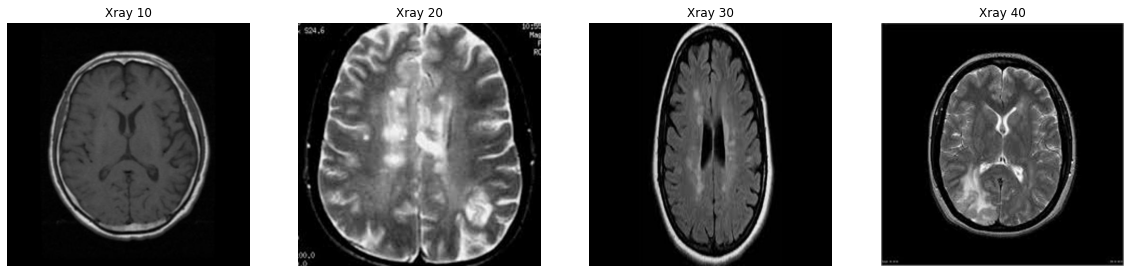

In [23]:
_,axs = plt.subplots(1,4,figsize=(20,10))
for (i,ax),(img_,j) in zip(enumerate(axs),[(get_img(resized_no_files[j]),j) 
                                           for j in [10,20,30,40]]):
    img_.show(ax=ax, title=f'Xray {j}')

padding_mode = "border"

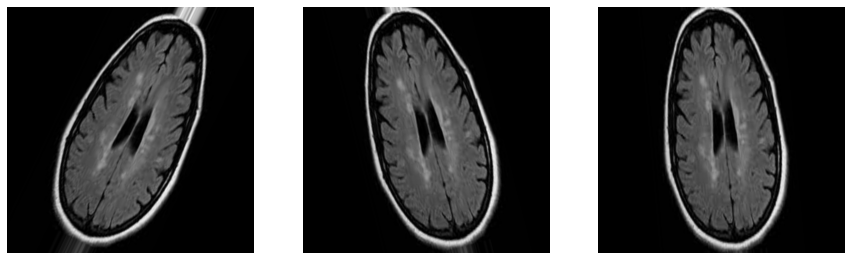

In [24]:
tfms = [rotate(degrees=(-30,30), p=1.0)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='border')

padding_mode = "reflection"

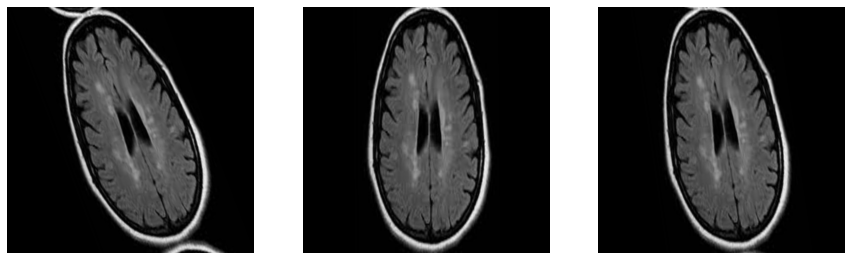

In [25]:
tfms = [rotate(degrees=(-30,30), p=1.0)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='reflection')

Brightness

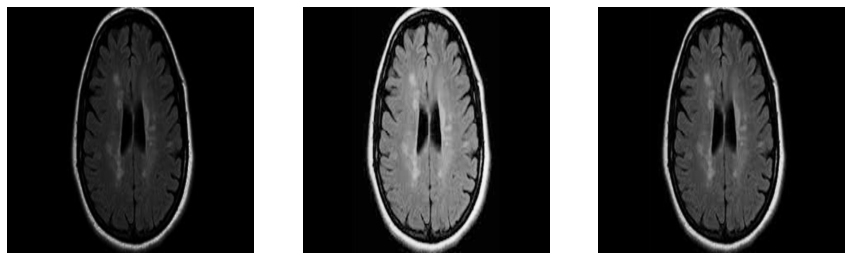

In [26]:
tfms = [brightness(change=(0.1, 0.9))]
plots_of_one_image(resized_no_files[30],tfms)

Contrast

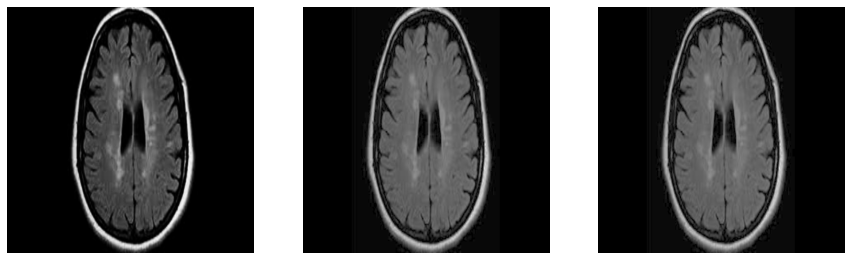

In [27]:
tfms = [contrast(scale=(0.5, 2.), p=1.)]
plots_of_one_image(resized_no_files[30],tfms)

Jitter

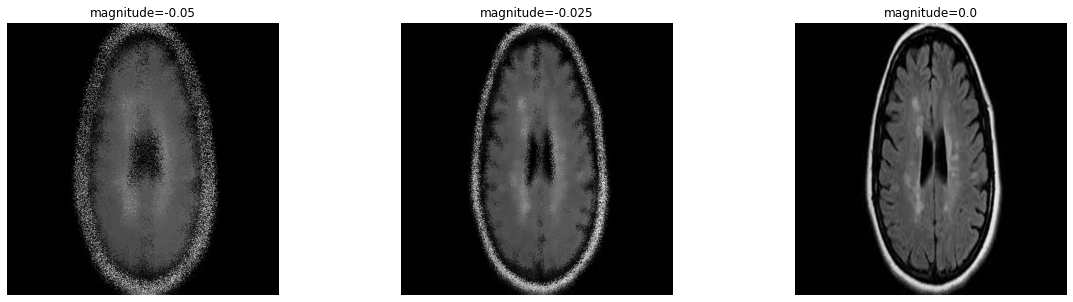

In [28]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfms = [jitter(magnitude=magnitude, p=1.)]
    get_img(resized_no_files[30]).apply_tfms(tfms).show(ax=ax,title="magnitude={}".format(magnitude))

Perspective

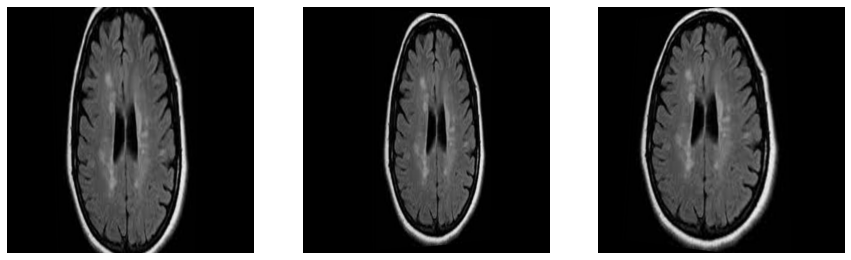

In [29]:
tfms = [symmetric_warp(magnitude=(-0.2,0.2), p=1.)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='zeros')

Zoom

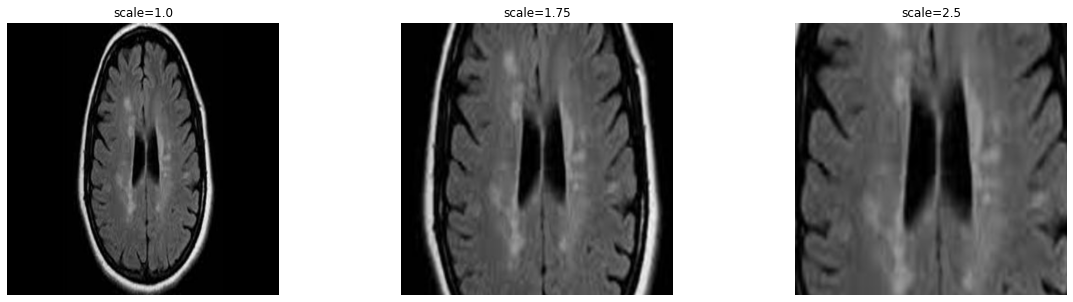

In [30]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
for scale, ax in zip(np.linspace(1.,2.5,3), axs):
    tfms = [zoom(scale=scale, p=1.)]
    get_img(resized_no_files[30]).apply_tfms(tfms).show(ax=ax,title='scale={}'.format(scale))

# Augment and save resized images

In [31]:
def save_augmentation(img_path, tfms, save_path, **kwargs):
    img = get_img(img_path)
    img.apply_tfms(tfms, **kwargs)
    img.save(save_path)

In [32]:
#resized_yes_files
def augment_and_save(files_list, tfms, tfm_name, **kwargs):
  file_num = 0
  for f in files_list:
    save_path = os.path.splitext(f)[0] + "_" + tfm_name + "_" + str(file_num) + "_" + ".jpg"
    print(save_path)
    save_augmentation(f, tfms, save_path, **kwargs)
    file_num += 1


In [33]:
# Rotated yes (tumor) images
#tfms = [rotate(degrees=(-30,30), p=1.0)]
#augment_and_save(resized_yes_files, tfms, "rotate", padding_mode='border')

In [60]:
# Rotated yes (tumor) images
tfms = [rotate(degrees=(-30,30), p=1.0)]
augment_and_save(resized_no_files, tfms, "rotate", padding_mode='border')

./kaggle_tumor_detection/resized_no/10 no_rotate_0_.jpg
./kaggle_tumor_detection/resized_no/1 no_rotate_1_.jpg
./kaggle_tumor_detection/resized_no/11 no_rotate_2_.jpg
./kaggle_tumor_detection/resized_no/7 no_rotate_3_.jpg
./kaggle_tumor_detection/resized_no/37 no_rotate_4_.jpg
./kaggle_tumor_detection/resized_no/44no_rotate_5_.jpg
./kaggle_tumor_detection/resized_no/45 no_rotate_6_.jpg
./kaggle_tumor_detection/resized_no/N16_rotate_7_.jpg
./kaggle_tumor_detection/resized_no/N22_rotate_8_.jpg
./kaggle_tumor_detection/resized_no/2 no_rotate_9_.jpg
./kaggle_tumor_detection/resized_no/48 no_rotate_10_.jpg
./kaggle_tumor_detection/resized_no/33 no_rotate_11_.jpg
./kaggle_tumor_detection/resized_no/3 no_rotate_12_.jpg
./kaggle_tumor_detection/resized_no/41 no_rotate_13_.jpg
./kaggle_tumor_detection/resized_no/35 no_rotate_14_.jpg
./kaggle_tumor_detection/resized_no/43 no_rotate_15_.jpg
./kaggle_tumor_detection/resized_no/42 no_rotate_16_.jpg
./kaggle_tumor_detection/resized_no/22 no_rotate_1

In [58]:
!mv ./kaggle_tumor_detection/resized_no/no.jpg ./kaggle_tumor_detection/

In [61]:
!ls ./kaggle_tumor_detection/

 archive.zip	       No17.jpg    'no 98.jpg'	 resized_no
 brain_tumor_dataset   no_18.jpg    no.jpg	 resized_yes
 No15.jpg	      'no 96.jpg'   output	 source.txt


# TODO: Cleanup the resized directory so that none of the augmented files are re-augmented!!

In [62]:
tfms = [rotate(degrees=(-30,30), p=1.0)]
augment_and_save(resized_yes_files, tfms, "reflect", padding_mode='reflection')
print("============")
augment_and_save(resized_no_files, tfms, "reflect", padding_mode='reflection')

./kaggle_tumor_detection/resized_yes/Y46_reflect_0_.jpg
./kaggle_tumor_detection/resized_yes/Y81_reflect_1_.jpg
./kaggle_tumor_detection/resized_yes/Y71_reflect_2_.jpg
./kaggle_tumor_detection/resized_yes/Y252_reflect_3_.jpg
./kaggle_tumor_detection/resized_yes/Y4_reflect_4_.jpg
./kaggle_tumor_detection/resized_yes/Y155_reflect_5_.jpg
./kaggle_tumor_detection/resized_yes/Y188_reflect_6_.jpg
./kaggle_tumor_detection/resized_yes/Y258_reflect_7_.jpg
./kaggle_tumor_detection/resized_yes/Y47_reflect_8_.jpg
./kaggle_tumor_detection/resized_yes/Y28_reflect_9_.jpg
./kaggle_tumor_detection/resized_yes/Y34_reflect_10_.jpg
./kaggle_tumor_detection/resized_yes/Y156_reflect_11_.jpg
./kaggle_tumor_detection/resized_yes/Y256_reflect_12_.jpg
./kaggle_tumor_detection/resized_yes/Y20_reflect_13_.jpg
./kaggle_tumor_detection/resized_yes/Y91_reflect_14_.jpg
./kaggle_tumor_detection/resized_yes/Y259_reflect_15_.jpg
./kaggle_tumor_detection/resized_yes/Y2_reflect_16_.jpg


KeyboardInterrupt: ignored

In [ ]:
tfms = [brightness(change=(0.1, 0.9))]
augment_and_save(resized_yes_files, tfms, "brightness", padding_mode=None)
print("============")
augment_and_save(resized_no_files, tfms, "brightness", padding_mode=None)